#                            Cars_Price_Prediction-2021


The dataset(car data.csv) contains information about the used cars listed on www.cardekho.com.
From this dataset we are going to predict the selling price of the used cars by traning our model. 

In [1]:
#Importing all the important libraries that are required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing train test split for traning and testing data
from sklearn.model_selection import train_test_split

#Importing Extratreeregression for feature selection
from sklearn.ensemble import ExtraTreesRegressor

#Importing random forest for regressor model
from sklearn.ensemble import RandomForestRegressor

#Importing randomsearchcv for hypertunning
from sklearn.model_selection import RandomizedSearchCV

#Importing pickle file
import pickle

In [2]:
#Importing car data.csv as it is in excel format we use read_csv
dataset = pd.read_csv("car data.csv")

In [3]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#Getting the info of dataset which are objects, int, float
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
print(dataset['Car_Name'].unique())
print(dataset['Fuel_Type'].unique())
print(dataset['Seller_Type'].unique())
print(dataset['Transmission'].unique())

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

In [7]:
#We can also make some observation using pandas_profiliing
# import pandas_profiling
# report = pandas_profiling.ProfileReport(dataset)
# report.to_file('car_data.html')

In [8]:
'''
In dataset we have year variable for different years.
here, we will make a variable that will say how old is the car by subtracting the current year
with cars year.
'''
dataset['Current_Year'] = 2021 #Making the current year variable

In [9]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [10]:
dataset['No_of_years'] = dataset['Current_Year'] - dataset['Year'] #Making the no_of_year variable

In [11]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [12]:
'''Dropping the Year and Current Year variable because we have a variable no_of_years
which says how old is the car.'''
dataset.drop(['Year'], axis=1, inplace=True)


In [13]:
dataset.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [14]:
#Dropping Current_year
dataset.drop(['Current_Year'], axis=1, inplace=True)

In [15]:
dataset.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [16]:
# Dropping Car_Name
dataset.drop(['Car_Name'], axis=1, inplace=True)

In [17]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [18]:
dataset.Owner.unique()

array([0, 1, 3], dtype=int64)

In [19]:
#Making the dummies of Fuel_Type and Droppping the first Dummy
Fuel = dataset['Fuel_Type']
Fuel = pd.get_dummies(Fuel, drop_first=True)

In [20]:
#Making the dummies of Seller_Type and Droppping the first Dummy
Seller = dataset['Seller_Type']
Seller = pd.get_dummies(Seller, drop_first=True)

In [21]:
#Making the dummies of Transmission and Droppping the first Dummy
User = dataset['Transmission']
User = pd.get_dummies(User, drop_first=True)

In [22]:
#Adding all the dummies with dataset into final_dataset
final_dataset = pd.concat([dataset,Fuel,Seller,User], axis=1)

In [23]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years,Diesel,Petrol,Individual,Manual
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7,0,1,0,1
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8,1,0,0,1
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4,0,1,0,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10,0,1,0,1
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7,1,0,0,1


In [24]:
#Dropping those variables which have catagorical features 
final_dataset.drop(['Fuel_Type','Seller_Type','Transmission'], axis=1, inplace=True)

In [25]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Diesel,Petrol,Individual,Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [26]:
#Making dependent and independent variable
X = final_dataset.iloc[:,1:9] #Independent
y = final_dataset.iloc[:,0]   #Dependent

In [27]:
X.head()

,Present_Price,Kms_Driven,Owner,No_of_years,Diesel,Petrol,Individual,Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [28]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [29]:
#To know the feature importance we use ExtraTreeRegressor
etr = ExtraTreesRegressor()
etr.fit(X,y)

ExtraTreesRegressor()

In [30]:
#Printing the Important Features
etr.feature_importances_

array([3.85872019e-01, 4.29746115e-02, 3.44620565e-04, 7.57332403e-02,
       2.30538691e-01, 1.47290923e-02, 1.18792690e-01, 1.31015035e-01])

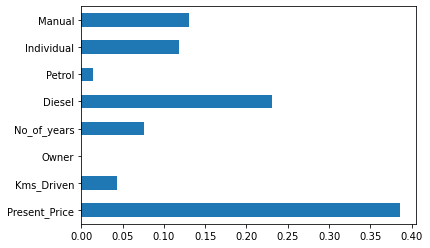

In [31]:
#Ploting the imoprtant feature in Graph
imp_feat = pd.Series(etr.feature_importances_, index=X.columns)
imp_feat.plot(kind='barh')
plt.show()

In [32]:
#Spliting Into traning and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 8)
(61, 8)
(240,)
(61,)


In [34]:
y_test.head()

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
Name: Selling_Price, dtype: float64

In [35]:
#Building a model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
#Predicting
y_pred = model.predict(X_test)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


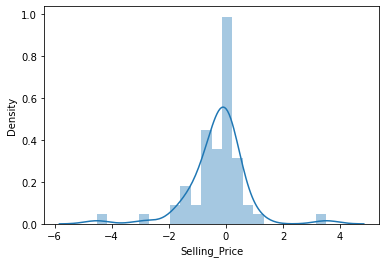

In [37]:
sns.distplot(y_pred-y_test)
plt.show()

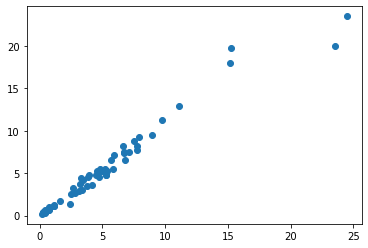

In [38]:
plt.scatter(y_pred, y_test)
plt.show()

In [39]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.6107
MSE: 1.062475374262295
RMSE: 1.0307644610978277


# HYPERTUNNING PARAMETRS

In [40]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [41]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [42]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [43]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [44]:
# rf_random.fit(X_train,y_train)

In [45]:
# rf_random.best_params_
'''
{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}
'''

"\n{'n_estimators': 700,\n 'min_samples_split': 15,\n 'min_samples_leaf': 1,\n 'max_features': 'auto',\n 'max_depth': 20}\n"

In [52]:
rf_random = RandomForestRegressor(n_estimators= 700,
                             min_samples_split = 15,
                             min_samples_leaf =  1,
                             max_features = 'auto',
                             max_depth =  20)
    
rf_random.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [53]:
predictions=rf_random.predict(X_test)

In [54]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7080490928810438
MSE: 1.8845450679954123
RMSE: 1.3727873353128708


In [55]:
rf_random.predict([[5.59,27000,0,7,0,1,0,1]])

C:\Users\acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3.70632946])

# Creating pickle file

In [58]:
### Create a Pickle file using serialization 
pickle_out = open("car_price_prediction.pkl","wb")
pickle.dump(rf_random, pickle_out)
pickle_out.close()